Analyzing metrics for benchmark: startup_idea_generator
Metrics by Model for benchmark 'startup_idea_generator':
      model  accuracy with eval  use_prompt with eval
      qwen3                 0.0                  99.0
    gpt-oss                 0.0                 100.0
llama3.2:1b                 0.0                  34.0
   llama3.3                 0.0                  99.0


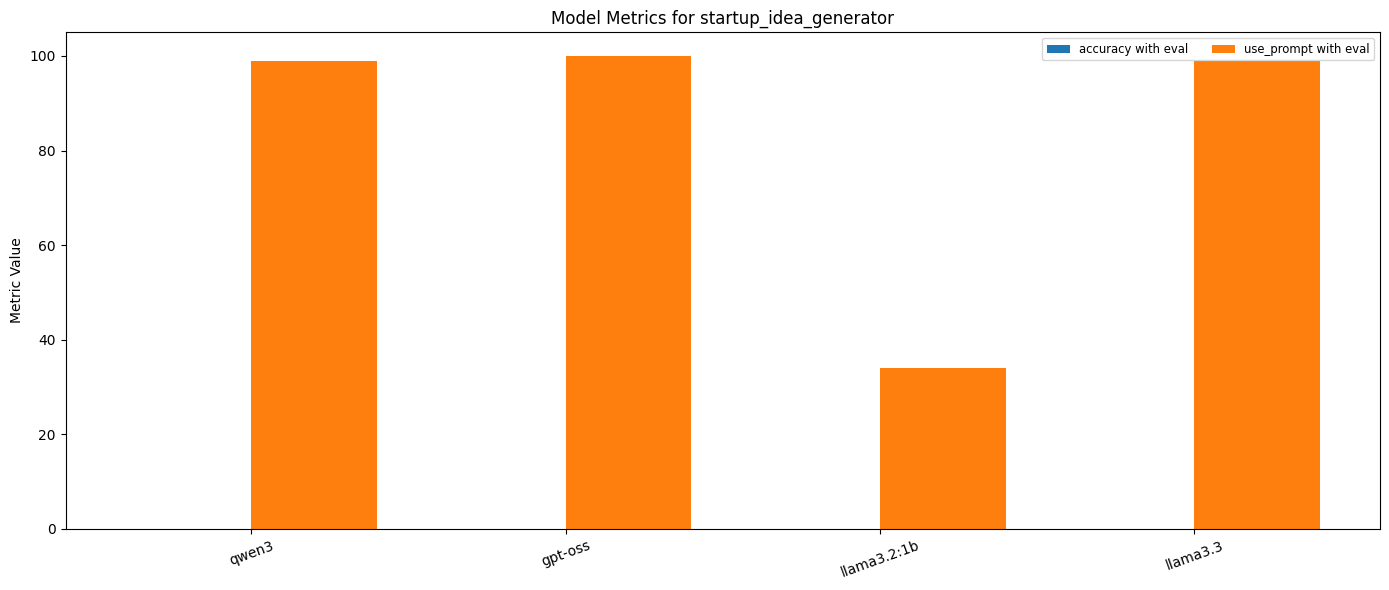

Analyzing metrics for benchmark: tea_taster
Metrics by Model for benchmark 'tea_taster':
      model  accuracy with eval  use_prompt with eval
      qwen3               73.75                  75.0
    gpt-oss               61.25                  25.0
llama3.2:1b                0.00                  75.0
   llama3.3               55.00                  50.0


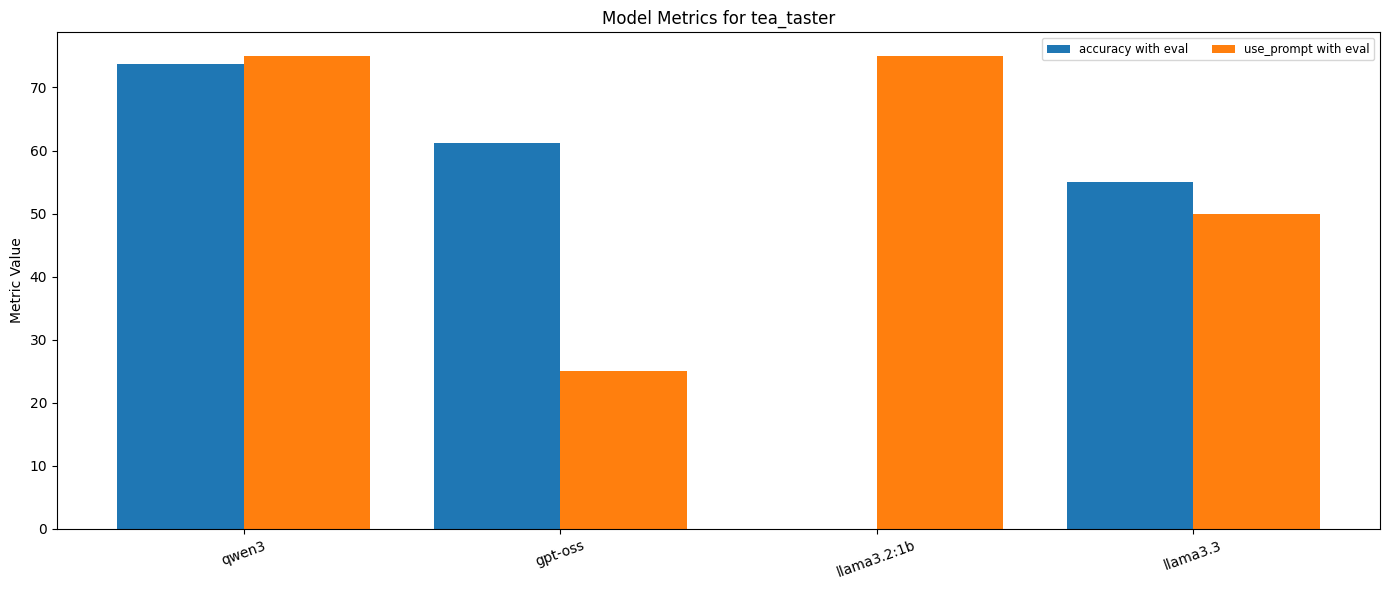

Analyzing metrics for benchmark: recruiter
Metrics by Model for benchmark 'recruiter':
      model  accuracy with eval  use_prompt with eval
      qwen3               58.75                  75.0
    gpt-oss               90.00                 100.0
llama3.2:1b               32.50                  75.0
   llama3.3               55.00                 100.0


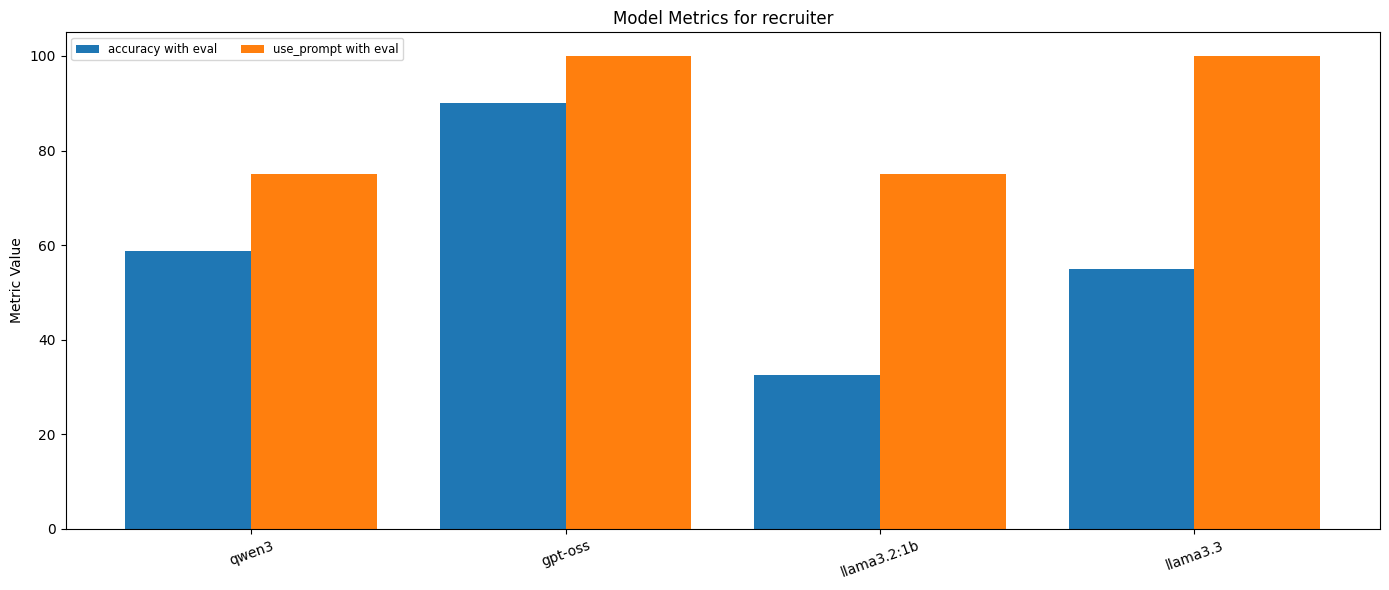

Analyzing metrics for benchmark: yes_or_no_answer
Metrics by Model for benchmark 'yes_or_no_answer':
      model  accuracy with eval  use_prompt with eval
      qwen3               100.0                 100.0
    gpt-oss                80.0                  80.0
llama3.2:1b                18.0                  60.0
   llama3.3                78.0                 100.0


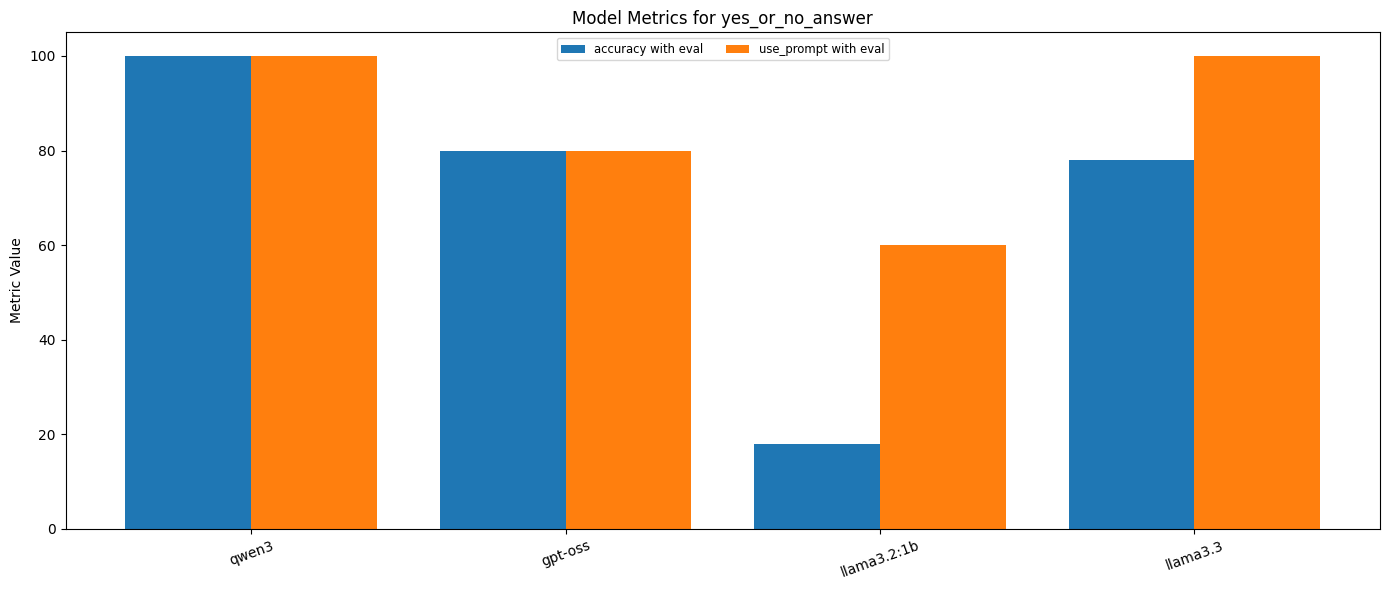

Analyzing metrics for benchmark: virtual_fitness_coach
Metrics by Model for benchmark 'virtual_fitness_coach':
      model  accuracy with eval  use_prompt with eval
      qwen3                71.0                  99.0
    gpt-oss                92.0                 100.0
llama3.2:1b                 0.0                  90.0
   llama3.3                32.0                 100.0


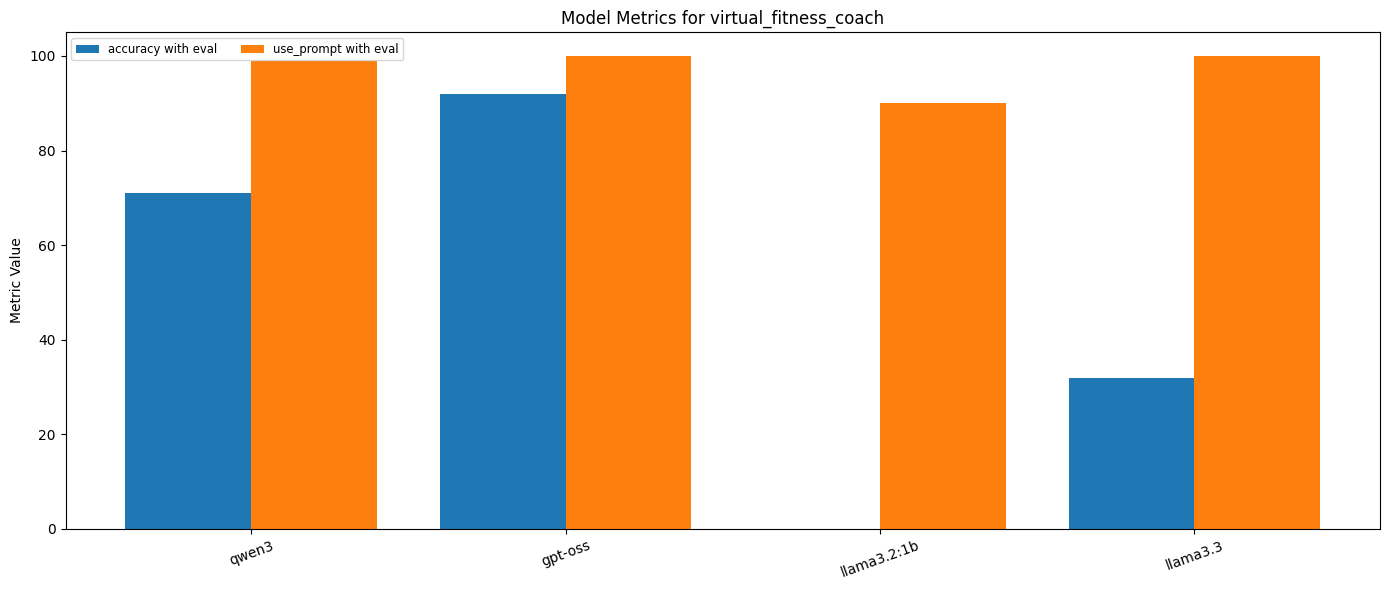

Analyzing metrics for benchmark: fancy_title_generator
Metrics by Model for benchmark 'fancy_title_generator':
      model  accuracy with eval  use_prompt with eval
      qwen3                 0.0                  85.0
    gpt-oss                 0.0                 100.0
llama3.2:1b                 0.0                  86.0
   llama3.3                 0.0                  70.0


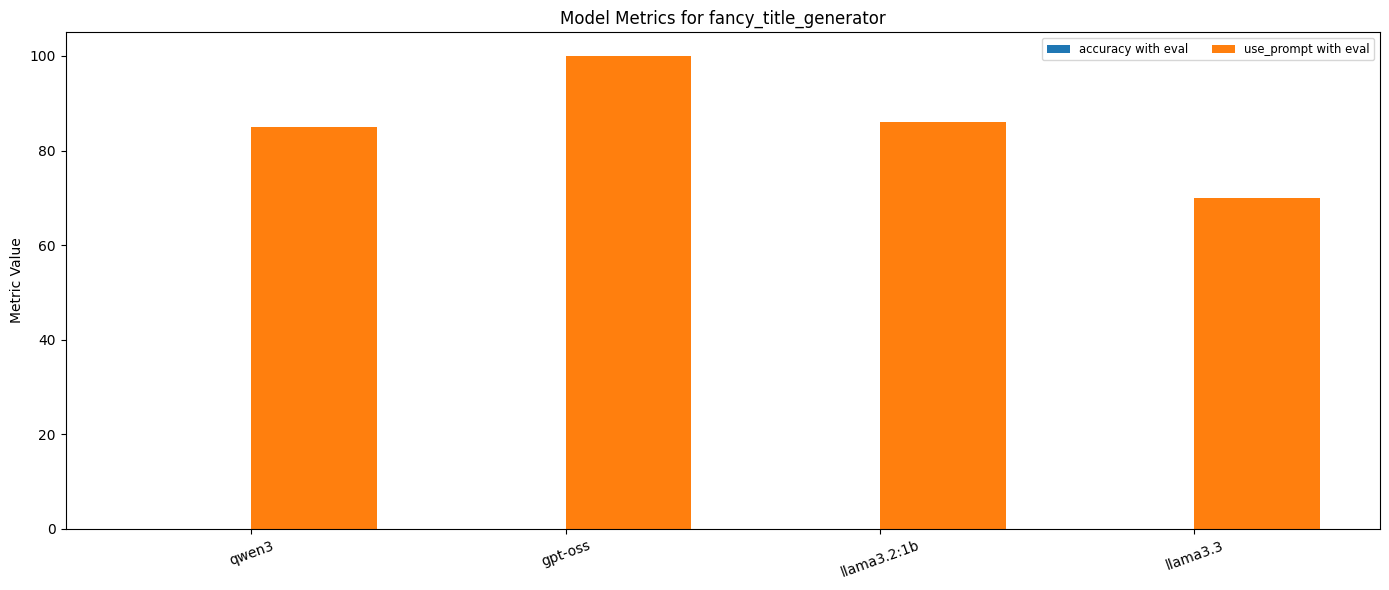

Analyzing metrics for benchmark: restaurant_owner
Metrics by Model for benchmark 'restaurant_owner':
      model  accuracy with eval  use_prompt with eval
      qwen3                24.0                   0.0
    gpt-oss                60.0                  20.0
llama3.2:1b                 5.0                   6.0
   llama3.3                62.0                  10.0


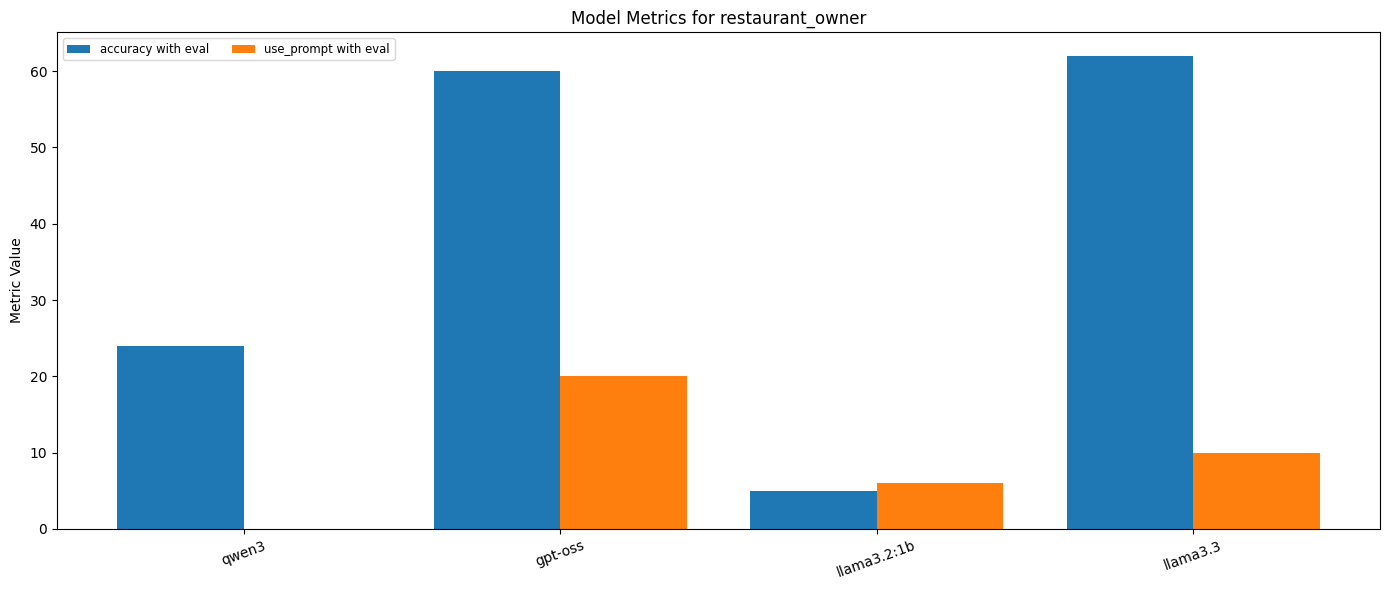

Analyzing metrics for benchmark: prompt_generator
Metrics by Model for benchmark 'prompt_generator':
      model  use_prompt with eval  accuracy with eval
      qwen3                  20.0                 8.0
    gpt-oss                  20.0                16.0
llama3.2:1b                   0.0                 0.0
   llama3.3                  20.0                20.0


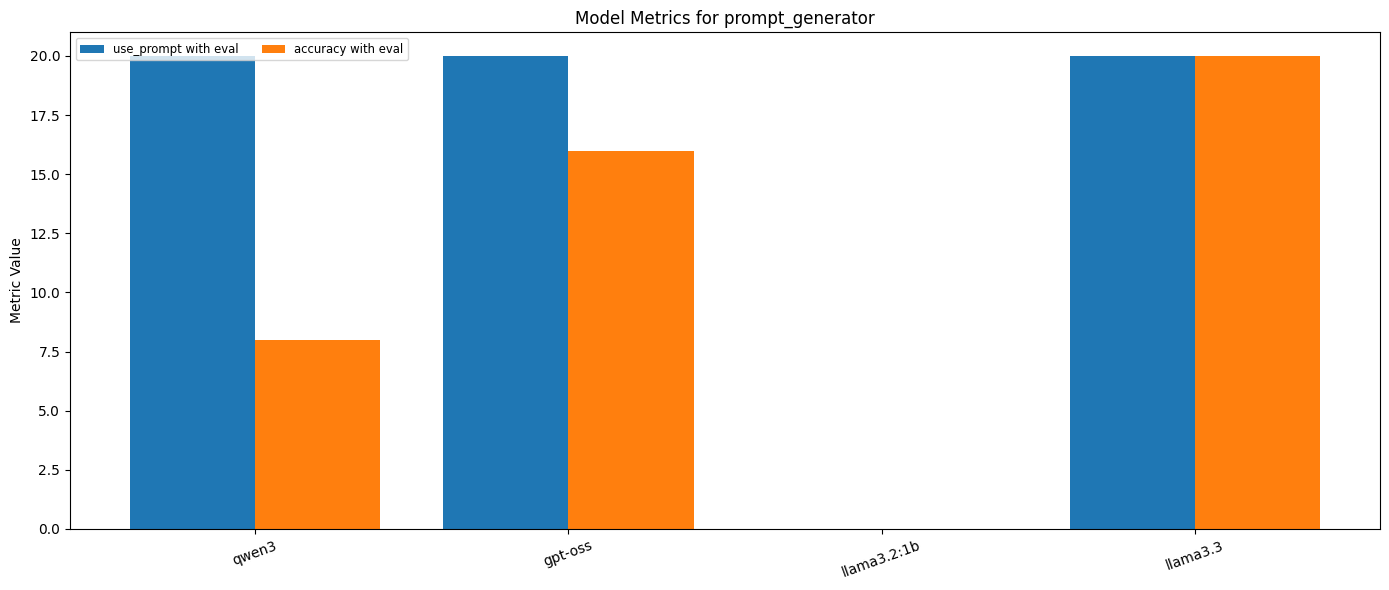

Analyzing metrics for benchmark: solr_search_engine
Metrics by Model for benchmark 'solr_search_engine':
      model  accuracy with eval  use_prompt with eval
      qwen3                 0.0                  46.0
    gpt-oss                 0.0                  40.0
llama3.2:1b                 0.0                   0.0
   llama3.3                 0.0                  76.0


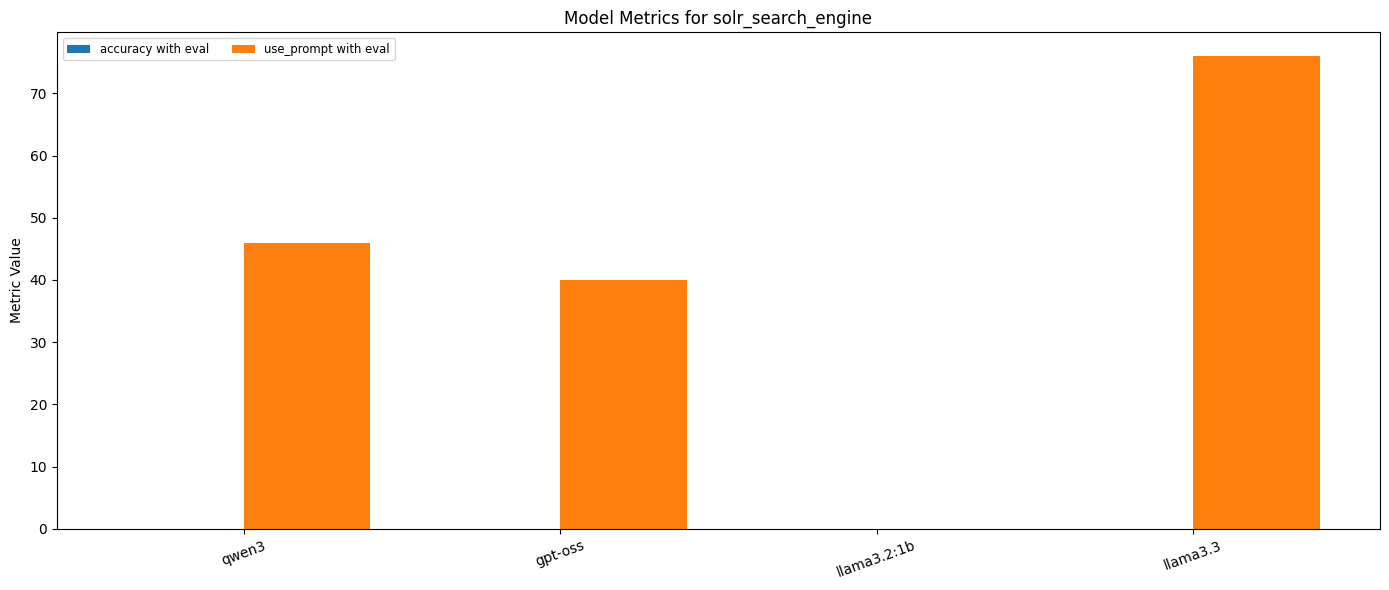

Analyzing metrics for benchmark: sewing_951_7
Metrics by Model for benchmark 'sewing_951_7':
      model  use_prompt with eval  accuracy with eval
      qwen3                 100.0                20.0
    gpt-oss                 100.0                43.0
llama3.2:1b                 100.0                 4.0
   llama3.3                 100.0                40.0


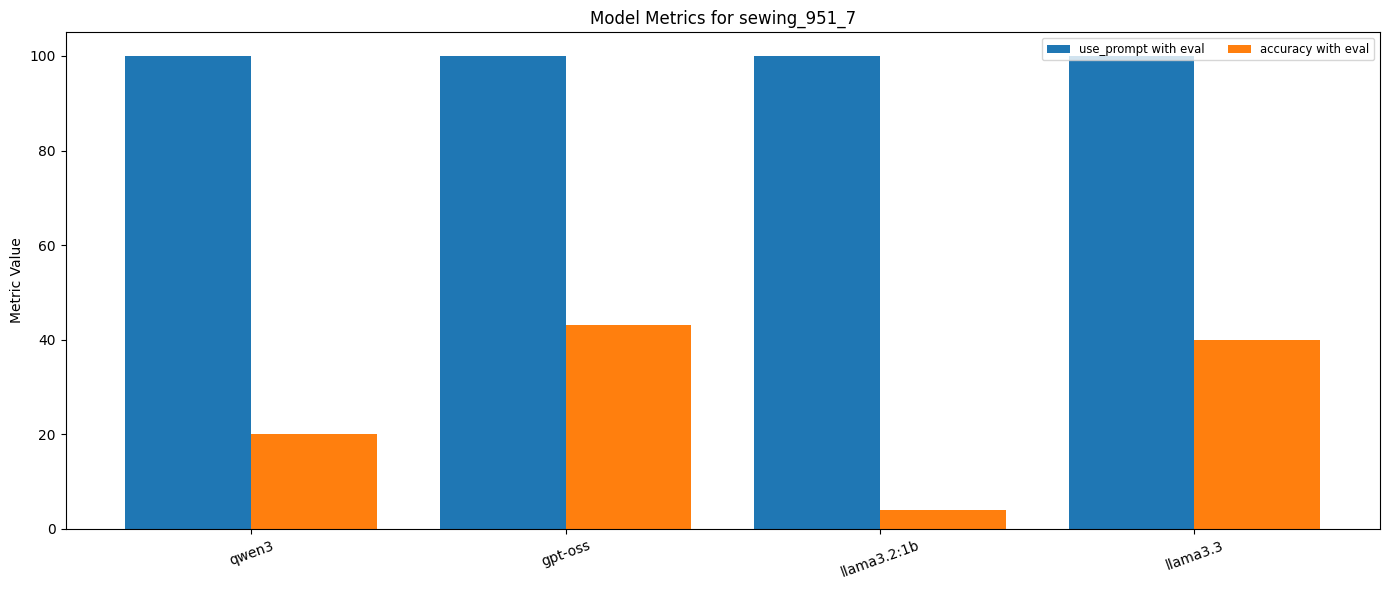

Analyzing metrics for benchmark: hearing_impairments_124_7
Metrics by Model for benchmark 'hearing_impairments_124_7':
      model  accuracy with eval  use_prompt with eval
      qwen3                72.0                 100.0
    gpt-oss                81.0                 100.0
llama3.2:1b                 6.0                  96.0
   llama3.3                62.0                 100.0


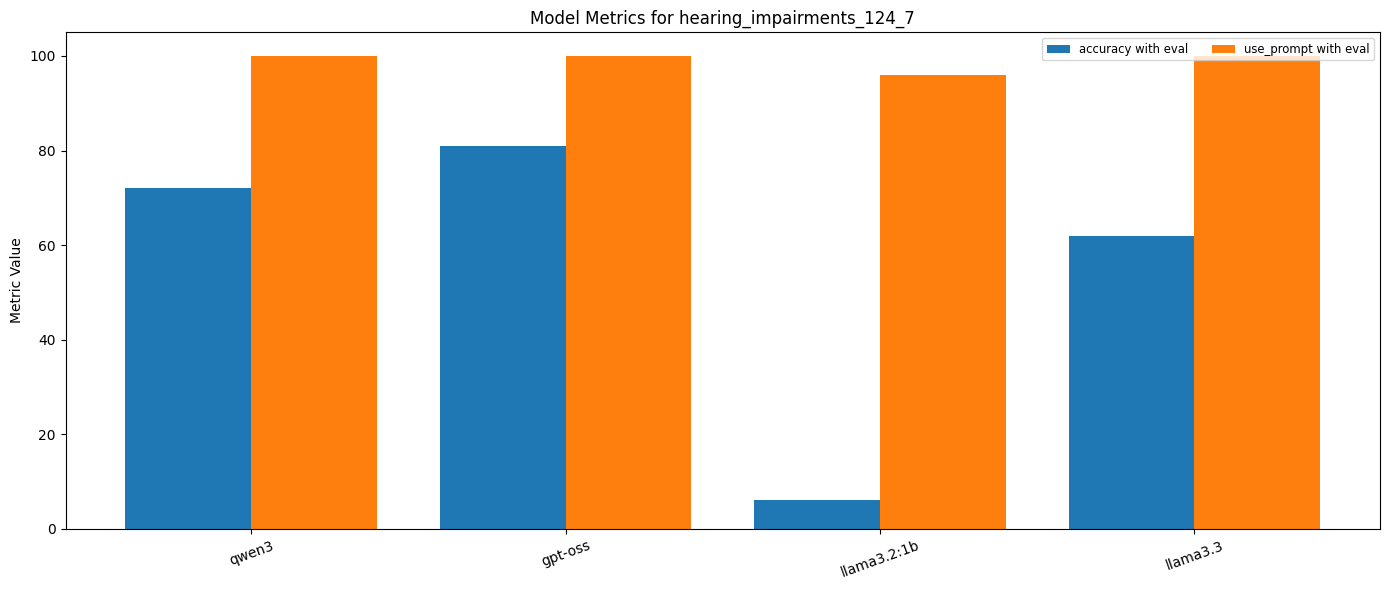

Analyzing metrics for benchmark: speaker_identification_595_2
Metrics by Model for benchmark 'speaker_identification_595_2':
      model  accuracy with eval  use_prompt with eval
      qwen3                18.0                 100.0
    gpt-oss                81.0                  99.0
llama3.2:1b                 0.0                  70.0
   llama3.3                24.0                 100.0


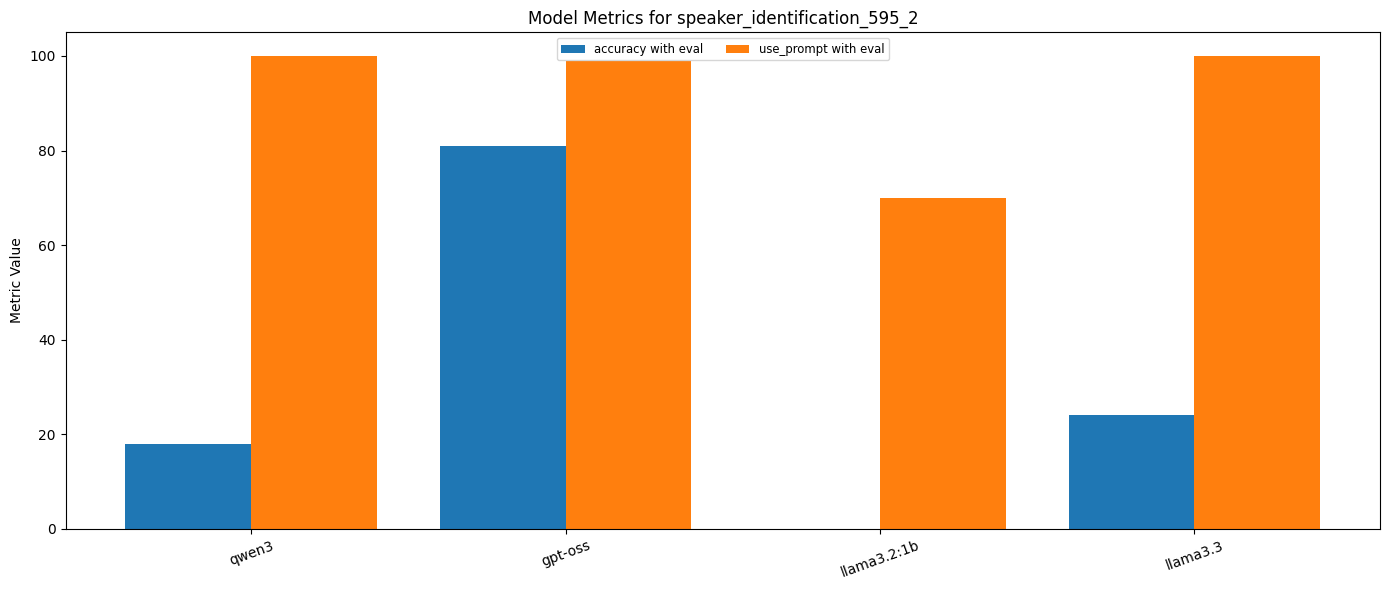

In [12]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

benchmarkVersion = "test-all-2025-09-19"

rootDir = "/workspaces/promptpex/"

if not os.path.isdir(rootDir):
    rootDir = ".."

evalsDir = f'{rootDir}/evals/{benchmarkVersion}/'


benchmarks = [
    "speech-tag"
]

# full list
benchmarks = [ "speech-tag", "classify-input-text", "text-to-p",  "sentence-rewrite", "extract-names", "elements", "art-prompt", "shakespearean-writing-assistant"]


benchmarks = [
    "bayesian_games_29_7",
    "bullet_journaling_145_1",
    "canopy_management_298_8",
    "fancy_title_generator",
    "hearing_impairments_124_7",
    "housing_market_dynamics_338_1",
    "initial_public_offerings_ipos_70_9",
    "news_broadcasting_693_9",
    "prompt_generator",
    "real_time_analytics_609_2",
    "recruiter",
    "restaurant_owner",
    "sewing_951_7",
    "solr_search_engine",
    "speaker_identification_595_2",
    "startup_idea_generator",
    "tea_taster",
    "virtual_fitness_coach",
    "yes_or_no_answer",
    "speech-tag", "classify-input-text", "text-to-p",  "sentence-rewrite", "extract-names", "elements", "art-prompt", "shakespearean-writing-assistant",
"modular_arithmetic_26_4",
"sleep_hygiene_174_3",
"supply_chain_risk_management_347_8",
"supporting_homework_and_study_habits_547_7",
"decentralized_finance_defi_937_2",
"fashion_brand_marketing_strategies_889_3",
"kombucha_brewing_479_10",
"smart_security_systems_554_2",
"autism_spectrum_disorder_124_2",
"sleep_hygiene_practices_163_4",
"virtual_fitness_coach",
"dentist",
"personal_stylist",
"developer_relations_consultant",
"biblical_translator",
"ai_assisted_doctor",
"web_design_consultant",
"public_speaking_coach",
"buddha",
"screenwriter",
]

benchmarks = [
"startup_idea_generator",
"tea_taster",
"recruiter",
"yes_or_no_answer",
"virtual_fitness_coach",
"fancy_title_generator",
"restaurant_owner",
"prompt_generator",
"solr_search_engine",
"sewing_951_7",
"hearing_impairments_124_7",
"speaker_identification_595_2",
] 

prettyBenchmarkNames = { "speech-tag": "speech-tag", 
                "text-to-p": "text-to-p",  
                "shakespearean-writing-assistant": "shakespeare", 
                "sentence-rewrite": "sentence", 
                "extract-names": "extract-names", 
                "elements":"elements", 
                "art-prompt": "art-prompt", 
                "classify-input-text": "classify"}

prettyMetrics = { "tests compliant": "prompt ok/err", 
                "system_compliant": "prompt only",  
                "rules_system_with_input_compliant": "prompt/rule/input"
}

def parse_metric(val):
    """Convert metric to float, handle %, NaN, and '--'."""
    if isinstance(val, str):
        val = val.strip()
        if val.endswith('%'):
            try:
                return float(val.strip('%'))
            except:
                return 0.0
        if val in ('NaN', '--', ''):
            return 0.0
    try:
        v = float(val)
        if np.isnan(v):
            return 0.0
        return v
    except:
        return 0.0

def get_metrics_start_col(df):
    """Get the start column index for metrics (after 'tests valid compliant')."""
    df.columns = df.columns.str.strip()  # Strip whitespace from column names
    
    if 'tests valid compliant' in df.columns:
        return df.columns.get_loc('tests valid') + 2
    elif 'tests negative' in df.columns:
        return df.columns.get_loc('tests negative compliant') + 2
    elif 'tests positive' in df.columns:
        return df.columns.get_loc('tests positive') + 2
    else:
        # Fallback: assume metrics start after 'model' column
        return df.columns.get_loc('model') + 2 if 'model' in df.columns else 0

    
def analyze_benchmark_metrics(benchmark, evalsDir, prettyBenchmarkNames):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    # Build the path to the overview.csv for the given benchmark
    csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")

    # Read the CSV
    df = pd.read_csv(csv_path)

    # Get the start column for metrics
    start_col = get_metrics_start_col(df)

    # Include "tests compliant" as a metric (ensure it's included)
    metrics = list(df.columns[start_col:])

    # Extract model names and metrics columns
    models = df['model']
    metrics_table = df[['model'] + metrics].copy()

    for metric in metrics:
        metrics_table[metric] = metrics_table[metric].apply(parse_metric)

    print(f"Metrics by Model for benchmark '{benchmark}':")
    print(metrics_table.to_string(index=False))

    # Plot grouped bar chart
    x = np.arange(len(models))
    width = 0.8 / len(metrics)  # total width for all bars per group

    fig, ax = plt.subplots(figsize=(14, 6))
    for i, metric in enumerate(metrics):
        ax.bar(x + i*width, metrics_table[metric], width, label=metric)

    ax.set_xticks(x + width*(len(metrics)-1)/2)
    ax.set_xticklabels(models, rotation=20)
    ax.set_ylabel('Metric Value')
    ax.set_title(f"Model Metrics for {prettyBenchmarkNames.get(benchmark, benchmark)}")
    ax.legend(loc='best', fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()

# Example usage:
for benchmark in benchmarks:
    # Call the function to analyze and plot metrics for each benchmark
    print(f"Analyzing metrics for benchmark: {benchmark}")
    analyze_benchmark_metrics(benchmark, evalsDir, prettyBenchmarkNames)

Average Metrics by Model:
Model	accuracy with eval	use_prompt with eval
gpt-oss	50.35	73.67
llama3.2:1b	5.46	57.67
llama3.3	35.67	77.08
qwen3	37.12	74.92


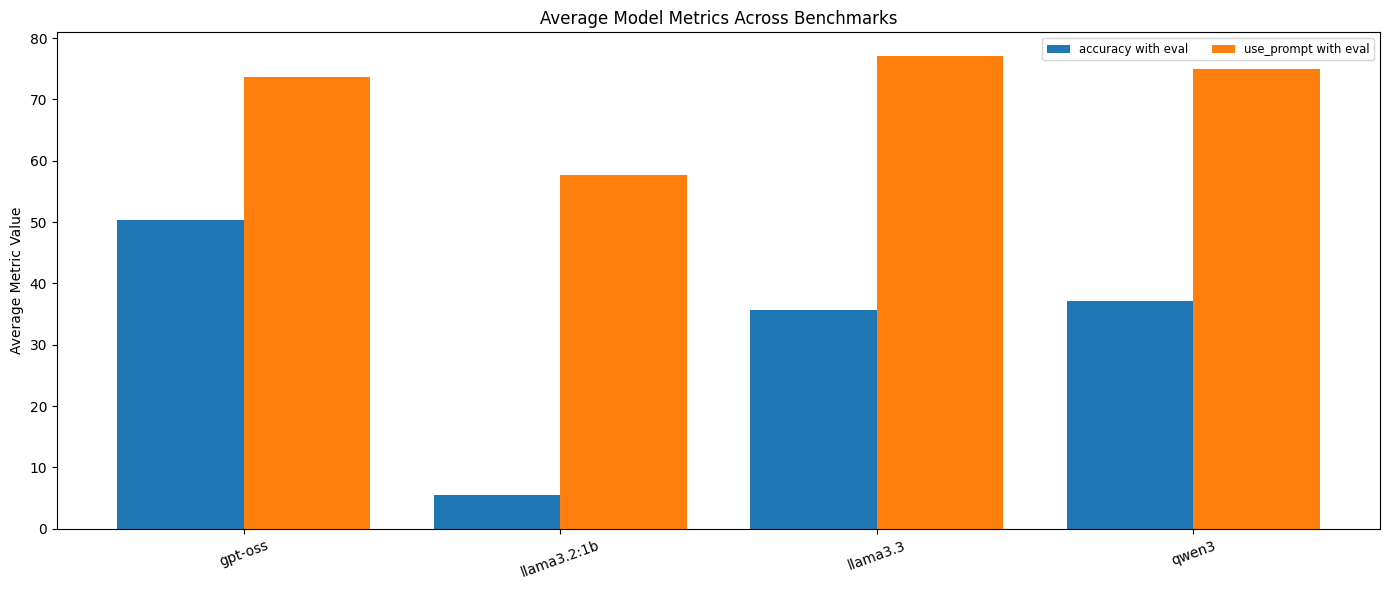

In [13]:

def collect_metrics(benchmarks, evalsDir):
    # Data structure: {benchmark: {model: {metric: value}}}
    all_data = {}
    all_metrics = set()
    all_models = set()

    for benchmark in benchmarks:
        csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        if not os.path.isfile(csv_path):
            print(f"Warning: {csv_path} not found, skipping.")
            continue
        df = pd.read_csv(csv_path)
        
        # Get the start column for metrics
        start_col = get_metrics_start_col(df)

        # Include "tests compliant" as a metric (ensure it's included)
        metrics = list(df.columns[start_col:])

        all_metrics.update(metrics)
        all_data[benchmark] = {}
        for _, row in df.iterrows():
            model = row['model']
            all_models.add(model)
            all_data[benchmark].setdefault(model, {})
            for metric in metrics:
                all_data[benchmark][model][metric] = parse_metric(row[metric])
    return all_data, sorted(all_models), sorted(all_metrics)

def compute_model_metric_averages(all_data, all_models, all_metrics):
    # {model: {metric: [values...]}}
    model_metric_values = {model: {metric: [] for metric in all_metrics} for model in all_models}
    for benchmark in all_data:
        for model in all_models:
            model_metrics = all_data[benchmark].get(model, {})
            for metric in all_metrics:
                val = model_metrics.get(metric, 0.0)
                model_metric_values[model][metric].append(val)
    # Compute averages
    model_metric_avg = {model: {metric: np.mean(vals) for metric, vals in metrics.items()} for model, metrics in model_metric_values.items()}
    return model_metric_avg

def print_metric_table(model_metric_avg):
    models = list(model_metric_avg.keys())
    metrics = list(next(iter(model_metric_avg.values())).keys())
    print("Average Metrics by Model:")
    header = ["Model"] + [prettyMetrics.get(m, m) for m in metrics]
    
    print("\t".join(header))
    for model in models:
        row = [model] + [f"{model_metric_avg[model][metric]:.2f}" for metric in metrics]
        print("\t".join(row))

def plot_grouped_bar_chart(model_metric_avg):
    models = list(model_metric_avg.keys())
    metrics = list(next(iter(model_metric_avg.values())).keys())
    x = np.arange(len(models))
    width = 0.8 / len(metrics)
    fig, ax = plt.subplots(figsize=(14, 6))
    for i, metric in enumerate(metrics):
        values = [model_metric_avg[model][metric] for model in models]
        ax.bar(x + i*width, values, width, label=metric)
    ax.set_xticks(x + width*(len(metrics)-1)/2)
    ax.set_xticklabels(models, rotation=20)
    ax.set_ylabel('Average Metric Value')
    ax.set_title('Average Model Metrics Across Benchmarks')
    ax.legend(loc='best', fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()



all_data, all_models, all_metrics = collect_metrics(benchmarks, evalsDir)
model_metric_avg = compute_model_metric_averages(all_data, all_models, all_metrics)
print_metric_table(model_metric_avg)
plot_grouped_bar_chart(model_metric_avg)

In [14]:
def print_benchmark_model_metrics_table(benchmarks, evalsDir, columns_of_interest):
    import os
    import pandas as pd
    
    width = 18
    def fit(val):
        s = str(val)
        return s[:width].ljust(width)[:width] 
    
    header = ["Benchmark", "Model"] + [
        prettyMetrics.get(col, col) for col in columns_of_interest
    ]

    print("".join([fit(h) for h in header]))
    for benchmark in benchmarks:
        csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        if not os.path.isfile(csv_path):
            continue
        df = pd.read_csv(csv_path)

        for _, row in df.iterrows():
            model = row['model']
            values = []
            for col in columns_of_interest:
                val0 = row.get(col, 0)
                val = parse_metric(val0)
                values.append(f"{val:.2f}")
            print("".join([fit(benchmark), fit(model)] + [fit(v) for v in values]))

# read csv for first benchmark
csv_path = os.path.join(evalsDir, benchmarks[0], benchmarks[0], "overview.csv")
df = pd.read_csv(csv_path)

# Get the start column for metrics
start_col = get_metrics_start_col(df)

# columns_of_interest = ["tests", "tests compliant", "errors", "tests compliance unknown"] + list(df.columns[start_col:])
columns_of_interest = list(df.columns[start_col:])

print_benchmark_model_metrics_table(benchmarks, evalsDir, columns_of_interest)

Benchmark         Model             accuracy with evaluse_prompt with ev
startup_idea_generqwen3             0.00              99.00             
startup_idea_genergpt-oss           0.00              100.00            
startup_idea_generllama3.2:1b       0.00              34.00             
startup_idea_generllama3.3          0.00              99.00             
tea_taster        qwen3             73.75             75.00             
tea_taster        gpt-oss           61.25             25.00             
tea_taster        llama3.2:1b       0.00              75.00             
tea_taster        llama3.3          55.00             50.00             
recruiter         qwen3             58.75             75.00             
recruiter         gpt-oss           90.00             100.00            
recruiter         llama3.2:1b       32.50             75.00             
recruiter         llama3.3          55.00             100.00            
yes_or_no_answer  qwen3             100.00         

Benchmark	accuracy with eval	use_prompt with eval
startup_idea_generator	0.00	332.00
tea_taster	190.00	225.00
recruiter	236.25	350.00
yes_or_no_answer	276.00	340.00
virtual_fitness_coach	195.00	389.00
fancy_title_generator	0.00	341.00
restaurant_owner	151.00	36.00
prompt_generator	44.00	60.00
solr_search_engine	0.00	162.00
sewing_951_7	107.00	400.00
hearing_impairments_124_7	221.00	396.00
speaker_identification_595_2	123.00	369.00


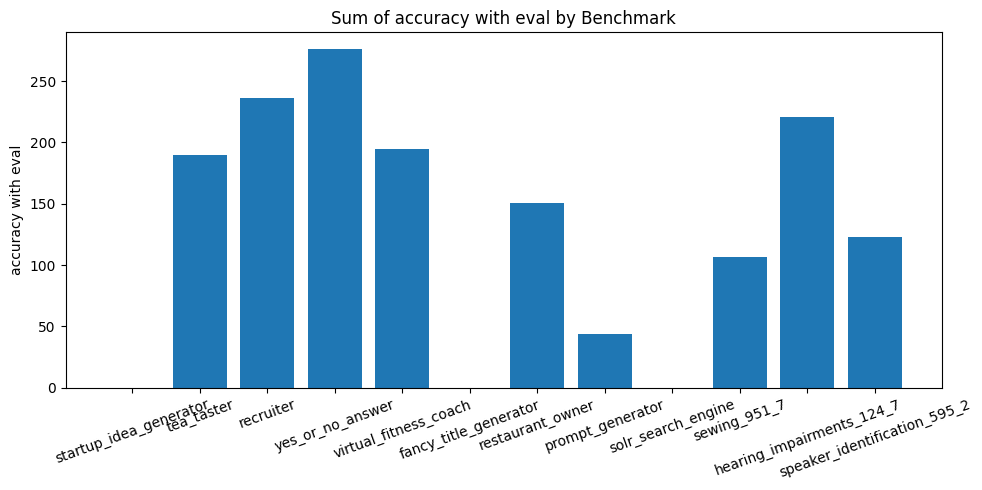

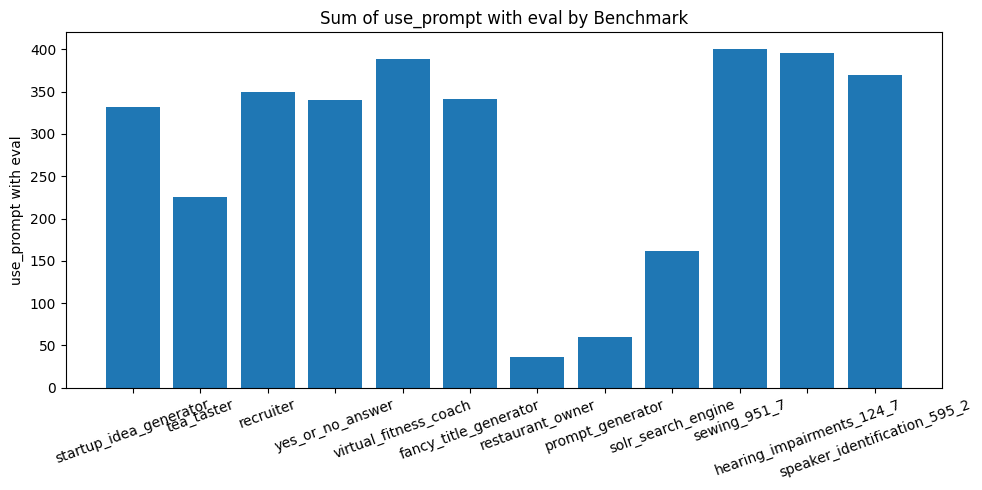

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def collect_and_sum_benchmark_metrics(benchmarks, evalsDir, columns_of_interest):
    # data[benchmark][model][column]
    data = {}
    sums = {bench: {col: 0.0 for col in columns_of_interest} for bench in benchmarks}
    for benchmark in benchmarks:
        csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        if not os.path.isfile(csv_path):
            print(f"Warning: {csv_path} not found, skipping.")
            continue
        df = pd.read_csv(csv_path)
        df.columns = df.columns.str.strip()  # Strip whitespace from column names
        data[benchmark] = {}
        for _, row in df.iterrows():
            model = row['model']
            data[benchmark][model] = {}
            for col in columns_of_interest:
                val = parse_metric(row.get(col, 0))
                data[benchmark][model][col] = val
                sums[benchmark][col] += val
    return data, sums

def print_sums_table(sums, columns_of_interest):
    print("Benchmark\t" + "\t".join(columns_of_interest))
    for bench, colvals in sums.items():
        row = [bench] + [f"{colvals[col]:.2f}" for col in columns_of_interest]
        print("\t".join(row))

def plot_sums_bar(sums, columns_of_interest):
    benchmarks = list(sums.keys())
    for col in columns_of_interest:
        values = [sums[bench][col] for bench in benchmarks]
        plt.figure(figsize=(10, 5))
        plt.bar(benchmarks, values)
        plt.ylabel(col)
        plt.title(f"Sum of {col} by Benchmark")
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.show()

# columns_of_interest = ["errors", "tests compliance unknown"]
# Get the start column for metrics
start_col = get_metrics_start_col(df)

# columns_of_interest = ["tests", "tests compliant", "errors", "tests compliance unknown"] + list(df.columns[start_col:])
columns_of_interest = list(df.columns[start_col:])

data, sums = collect_and_sum_benchmark_metrics(benchmarks, evalsDir, columns_of_interest)
print_sums_table(sums, columns_of_interest)
plot_sums_bar(sums, columns_of_interest)

Benchmark	Average Tests per Model
startup_idea_generator	10.00
tea_taster	8.00
recruiter	8.00
yes_or_no_answer	10.00
virtual_fitness_coach	10.00
fancy_title_generator	10.00
restaurant_owner	10.00
prompt_generator	10.00
solr_search_engine	10.00
sewing_951_7	10.00
hearing_impairments_124_7	10.00
speaker_identification_595_2	10.00


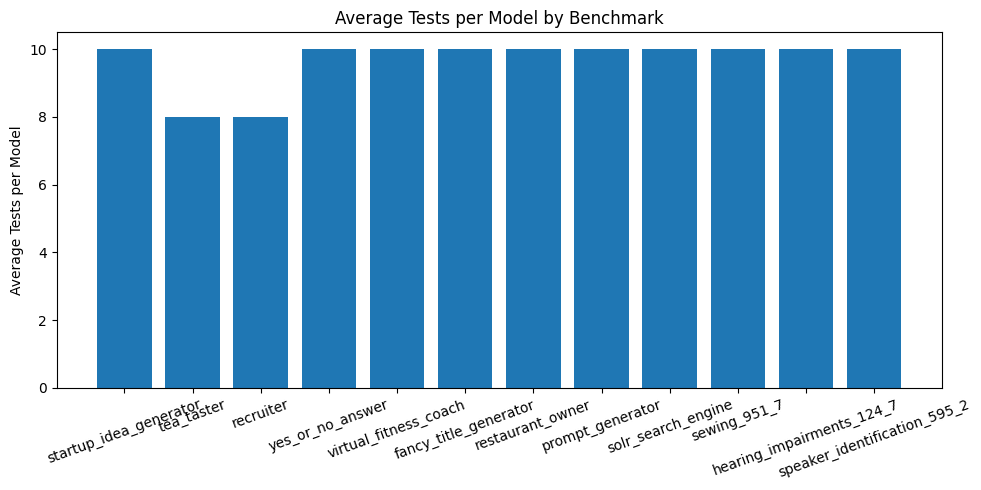

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def average_tests_per_model(benchmarks, evalsDir):
    averages = {}
    for benchmark in benchmarks:
        csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        if not os.path.isfile(csv_path):
            print(f"Warning: {csv_path} not found, skipping.")
            continue
        df = pd.read_csv(csv_path)
        df.columns = df.columns.str.strip()
        # Parse the 'tests' column for all models
        tests = df['tests'].apply(parse_metric)
        if len(tests) > 0:
            avg = np.mean(tests)
        else:
            avg = 0.0
        averages[benchmark] = avg
    return averages

def print_avg_table(averages):
    print("Benchmark\tAverage Tests per Model")
    for bench, avg in averages.items():
        print(f"{bench}\t{avg:.2f}")

def plot_avg_bar(averages):
    benchmarks = list(averages.keys())
    values = list(averages.values())
    plt.figure(figsize=(10, 5))
    plt.bar(benchmarks, values)
    plt.ylabel("Average Tests per Model")
    plt.title("Average Tests per Model by Benchmark")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()



averages = average_tests_per_model(benchmarks, evalsDir)
print_avg_table(averages)
plot_avg_bar(averages)

Available columns:
['model', 'tests', 'tests compliant', 'tests positive', 'tests positive compliant', 'tests negative', 'tests negative compliant', 'tests valid', 'tests valid compliant', 'accuracy with eval', 'use_prompt with eval']

Plotting column: tests compliant


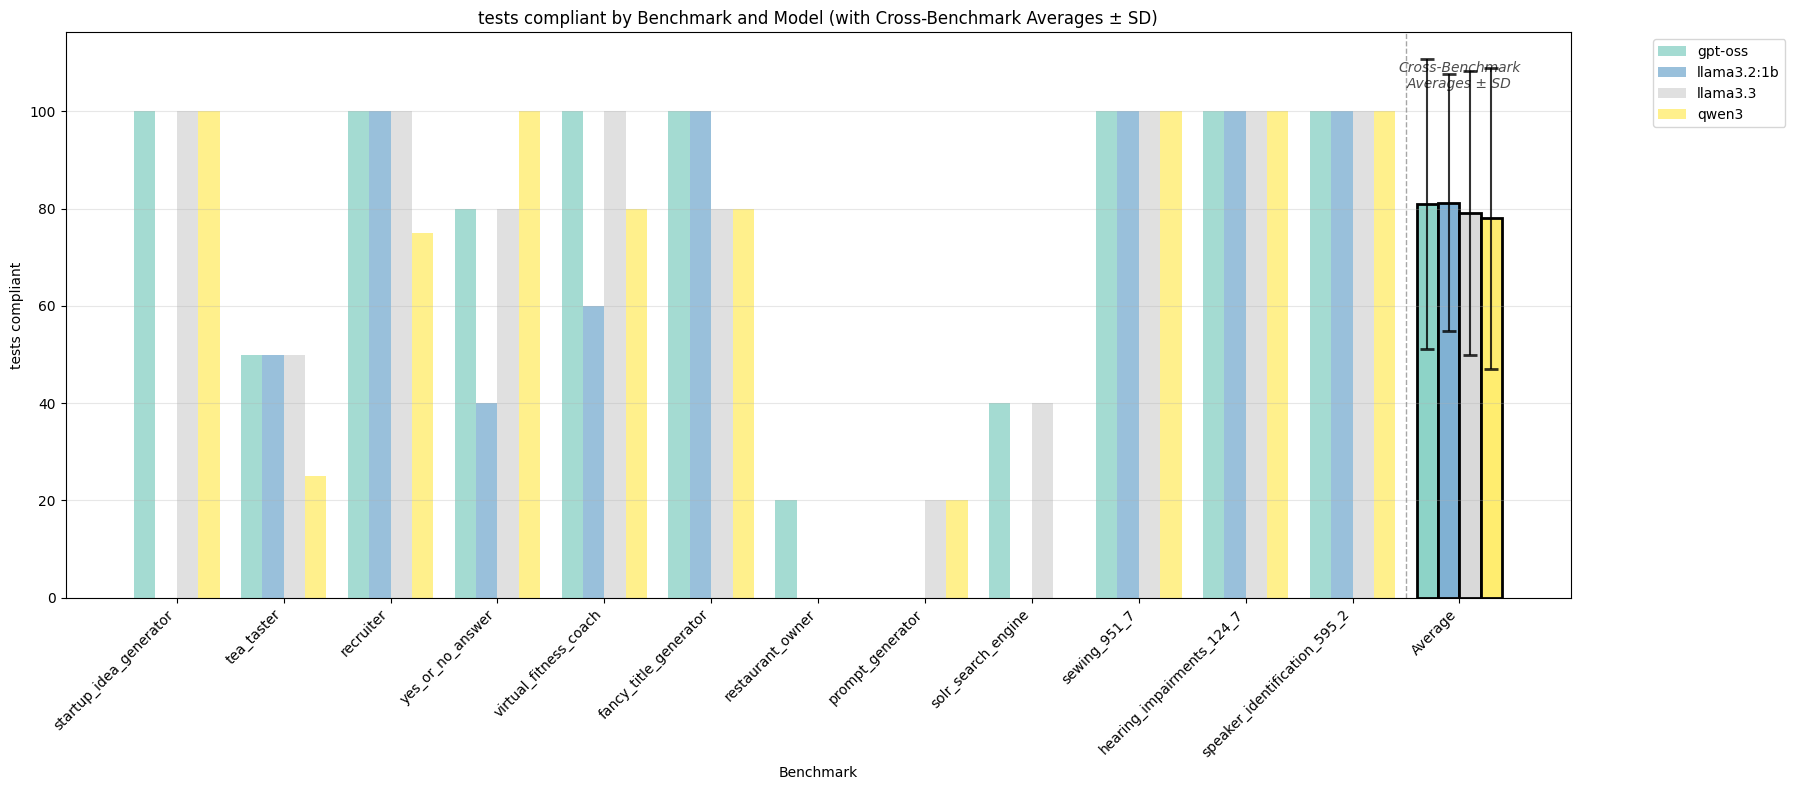


Model Statistics for tests compliant:
gpt-oss: 80.91 ± 29.82
llama3.2:1b: 81.25 ± 26.42
llama3.3: 79.09 ± 29.14
qwen3: 78.00 ± 30.93
Plotting column: accuracy with eval


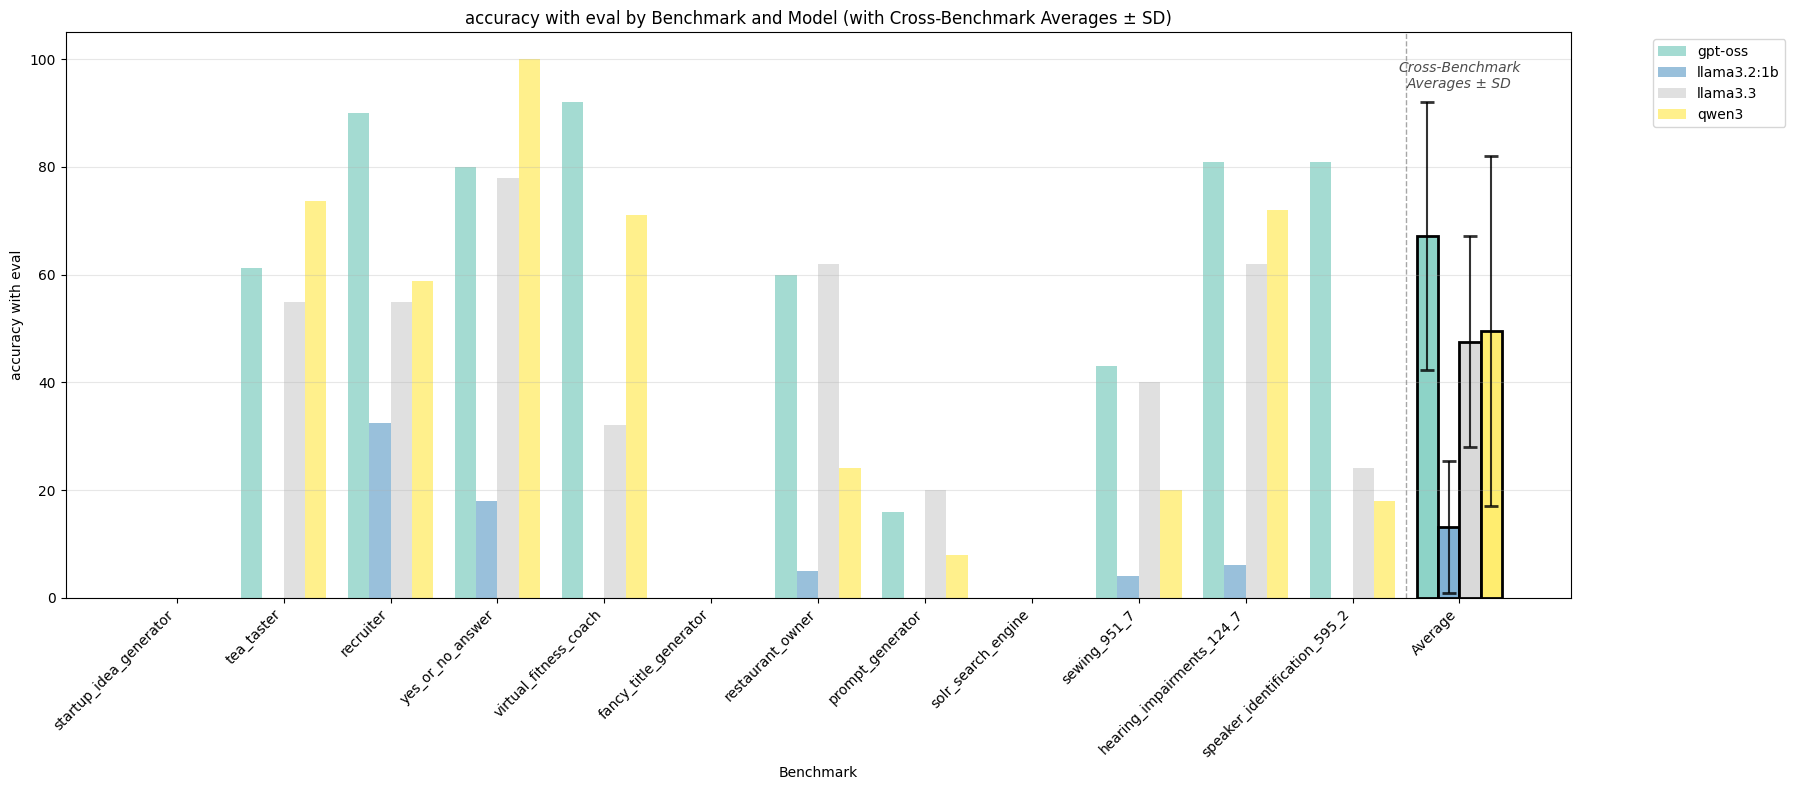


Model Statistics for accuracy with eval:
gpt-oss: 67.14 ± 24.93
llama3.2:1b: 13.10 ± 12.24
llama3.3: 47.56 ± 19.58
qwen3: 49.50 ± 32.46


In [17]:
def plot_grouped_barplot_by_benchmark_and_model(benchmarks, evalsDir, column_of_interest):
    """
    Create a grouped barplot showing a specific column as a function of benchmark and model.
    Groups are benchmarks, bars within groups are models.
    Includes an additional "Average" group showing averages across benchmarks for each model.
    """
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Data structure: {benchmark: {model: value}}
    data = {}
    all_models = set()
    
    for benchmark in benchmarks:
        csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        if not os.path.isfile(csv_path):
            print(f"Warning: {csv_path} not found, skipping.")
            continue
        df = pd.read_csv(csv_path)
        df.columns = df.columns.str.strip()
        
        if "model" not in df.columns or column_of_interest not in df.columns:
            print(f"Warning: Required columns not found in {csv_path}, skipping.")
            continue
            
        data[benchmark] = {}
        for _, row in df.iterrows():
            model = row["model"]
            val = parse_metric(row[column_of_interest])
            data[benchmark][model] = val
            all_models.add(model)
    
    all_models = sorted(all_models)
    benchmarks_with_data = [b for b in benchmarks if b in data]
    
    if not benchmarks_with_data or not all_models:
        print("No data found for plotting.")
        return
    
    # Build data matrix: rows=benchmarks, columns=models
    values = []
    for benchmark in benchmarks_with_data:
        row = []
        for model in all_models:
            row.append(data.get(benchmark, {}).get(model, 0.0))
        values.append(row)
    values = np.array(values)  # shape: (num_benchmarks, num_models)
    
    # Calculate averages and standard deviations across benchmarks for each model
    model_averages = []
    model_std_devs = []
    for i, model in enumerate(all_models):
        # Get values for this model across all benchmarks
        model_values = values[:, i]
        # Only consider non-zero values for statistics
        non_zero_values = model_values[model_values > 0]
        if len(non_zero_values) > 0:
            avg = np.mean(non_zero_values)
            std = np.std(non_zero_values, ddof=1) if len(non_zero_values) > 1 else 0.0
        else:
            avg = 0.0
            std = 0.0
        model_averages.append(avg)
        model_std_devs.append(std)
    
    # Add the average row to the data
    all_values = np.vstack([values, model_averages])
    all_labels = benchmarks_with_data + ["Average"]
    
    # Create the grouped bar plot
    x = np.arange(len(all_labels))  # positions for all groups including average
    width = 0.8 / len(all_models)  # width of individual bars
    
    fig, ax = plt.subplots(figsize=(18, 8))
    
    # Create bars for each model
    colors = plt.cm.Set3(np.linspace(0, 1, len(all_models)))  # Use distinct colors
    for i, model in enumerate(all_models):
        offset = (i - (len(all_models) - 1) / 2) * width
        bars = ax.bar(x + offset, all_values[:, i], width, label=model, alpha=0.8, color=colors[i])
        
        # Add error bars only to the average (last) bar
        if len(bars) > len(benchmarks_with_data):
            # Highlight the average bars with different styling
            bars[-1].set_alpha(1.0)  # Make average bar more opaque
            bars[-1].set_edgecolor('black')  # Add black border to average bar
            bars[-1].set_linewidth(2)
            
            # Add error bar to the average bar
            avg_x_pos = x[-1] + offset
            avg_height = model_averages[i]
            error_bar = model_std_devs[i]
            
            if error_bar > 0:  # Only add error bar if we have variation
                ax.errorbar(avg_x_pos, avg_height, yerr=error_bar, 
                           fmt='none', color='black', capsize=5, capthick=2, alpha=0.8)
    
    # Add a vertical separator line before the average group
    if len(all_labels) > 1:
        separator_x = len(benchmarks_with_data) - 0.5
        ax.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=1)
    
    # Customize the plot
    ax.set_xlabel('Benchmark')
    ax.set_ylabel(column_of_interest)
    ax.set_title(f'{column_of_interest} by Benchmark and Model (with Cross-Benchmark Averages ± SD)')
    ax.set_xticks(x)
    ax.set_xticklabels(all_labels, rotation=45, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add text annotation for the average section
    if len(all_labels) > 1:
        ax.text(len(benchmarks_with_data), ax.get_ylim()[1] * 0.95, 'Cross-Benchmark\nAverages ± SD', 
                ha='center', va='top', fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics including standard deviations
    print(f"\nModel Statistics for {column_of_interest}:")
    print("=" * 60)
    for i, model in enumerate(all_models):
        print(f"{model}: {model_averages[i]:.2f} ± {model_std_devs[i]:.2f}")

# Example usage with a specific column
# You can change this to any column that exists in your data
column_to_plot = "tests compliant"

# First check what columns are available in the first benchmark
csv_path = os.path.join(evalsDir, benchmarks[0], benchmarks[0], "overview.csv")
if os.path.isfile(csv_path):
    df_sample = pd.read_csv(csv_path)
    df_sample.columns = df_sample.columns.str.strip()
    print("Available columns:")
    print(df_sample.columns.tolist())
    print()
    
    # Try to find a good column to plot
    if "tests compliant" in df_sample.columns:
        column_to_plot = "tests compliant"
    elif "accuracy with eval" in df_sample.columns:
        column_to_plot = "accuracy with eval"
    else:
        # Use the first metric column after standard columns
        start_col = get_metrics_start_col(df_sample)
        
        if start_col < len(df_sample.columns):
            column_to_plot = df_sample.columns[start_col]

print(f"Plotting column: {column_to_plot}")
plot_grouped_barplot_by_benchmark_and_model(benchmarks, evalsDir, column_to_plot)

column_to_plot = "accuracy with eval"
print(f"Plotting column: {column_to_plot}")
plot_grouped_barplot_by_benchmark_and_model(benchmarks, evalsDir, column_to_plot)

In [18]:
def compare_baseline_vs_main_metrics(benchmark, evalsDir, prettyBenchmarkNames=None):
    """
    Compare metrics between overview.csv and overview-baseline.csv files for a given benchmark.
    Creates side-by-side bar charts and difference analysis.
    """
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Build paths to both CSV files
    main_csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
    baseline_csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview-baseline.csv")
    
    # Check if both files exist
    if not os.path.isfile(main_csv_path):
        print(f"Warning: Main file {main_csv_path} not found, skipping.")
        return
    if not os.path.isfile(baseline_csv_path):
        print(f"Warning: Baseline file {baseline_csv_path} not found, skipping.")
        return
    
    # Read both CSV files
    main_df = pd.read_csv(main_csv_path)
    baseline_df = pd.read_csv(baseline_csv_path)
    
    # Strip whitespace from column names
    main_df.columns = main_df.columns.str.strip()
    baseline_df.columns = baseline_df.columns.str.strip()
    
    # Find common models
    main_models = set(main_df['model'])
    baseline_models = set(baseline_df['model'])
    common_models = sorted(main_models.intersection(baseline_models))
    
    if not common_models:
        print(f"No common models found between main and baseline for benchmark '{benchmark}'")
        return
    
    # Find common metric columns (excluding 'model' and other non-metric columns)
    main_start_col = get_metrics_start_col(main_df)
    baseline_start_col = get_metrics_start_col(baseline_df)
    
    main_metrics = set(main_df.columns[main_start_col:])
    baseline_metrics = set(baseline_df.columns[baseline_start_col:])
    common_metrics = sorted(main_metrics.intersection(baseline_metrics))
    
    if not common_metrics:
        print(f"No common metrics found between main and baseline for benchmark '{benchmark}'")
        print(f"Main metrics: {list(main_metrics)}")
        print(f"Baseline metrics: {list(baseline_metrics)}")
        return
    
    print(f"Comparing benchmark '{benchmark}' with {len(common_models)} models and {len(common_metrics)} metrics")
    print(f"Common models: {common_models}")
    print(f"Common metrics: {common_metrics}")
    
    # Prepare data for comparison
    comparison_data = {}
    for model in common_models:
        main_row = main_df[main_df['model'] == model].iloc[0] if len(main_df[main_df['model'] == model]) > 0 else None
        baseline_row = baseline_df[baseline_df['model'] == model].iloc[0] if len(baseline_df[baseline_df['model'] == model]) > 0 else None
        
        if main_row is not None and baseline_row is not None:
            comparison_data[model] = {
                'main': {metric: parse_metric(main_row[metric]) for metric in common_metrics},
                'baseline': {metric: parse_metric(baseline_row[metric]) for metric in common_metrics}
            }
    
    # Create side-by-side comparison plots
    n_metrics = len(common_metrics)
    n_models = len(comparison_data)
    
    if n_metrics == 0 or n_models == 0:
        print("No data to plot")
        return
    
    # Create subplots for each metric
    fig, axes = plt.subplots(n_metrics, 1, figsize=(12, 4 * n_metrics))
    if n_metrics == 1:
        axes = [axes]
    
    for i, metric in enumerate(common_metrics):
        ax = axes[i]
        
        models = list(comparison_data.keys())
        main_values = [comparison_data[model]['main'][metric] for model in models]
        baseline_values = [comparison_data[model]['baseline'][metric] for model in models]
        
        x = np.arange(len(models))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, baseline_values, width, label='Baseline', alpha=0.8, color='lightcoral')
        bars2 = ax.bar(x + width/2, main_values, width, label='Main', alpha=0.8, color='skyblue')
        
        ax.set_xlabel('Model')
        ax.set_ylabel(metric)
        ax.set_title(f'{metric} - Baseline vs Main ({prettyBenchmarkNames.get(benchmark, benchmark) if prettyBenchmarkNames else benchmark})')
        ax.set_xticks(x)
        ax.set_xticklabels(models, rotation=45, ha='right')
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for bar in bars1:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8)
        
        for bar in bars2:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Create difference analysis plot
    fig, axes = plt.subplots(n_metrics, 1, figsize=(12, 4 * n_metrics))
    if n_metrics == 1:
        axes = [axes]
    
    for i, metric in enumerate(common_metrics):
        ax = axes[i]
        
        models = list(comparison_data.keys())
        differences = [comparison_data[model]['main'][metric] - comparison_data[model]['baseline'][metric] for model in models]
        
        # Color bars based on positive/negative change
        colors = ['green' if diff > 0 else 'red' if diff < 0 else 'gray' for diff in differences]
        
        bars = ax.bar(models, differences, color=colors, alpha=0.7)
        
        ax.set_xlabel('Model')
        ax.set_ylabel(f'{metric} Difference (Main - Baseline)')
        ax.set_title(f'{metric} - Improvement Analysis ({prettyBenchmarkNames.get(benchmark, benchmark) if prettyBenchmarkNames else benchmark})')
        ax.set_xticklabels(models, rotation=45, ha='right')
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for bar, diff in zip(bars, differences):
            height = bar.get_height()
            ax.annotate(f'{diff:+.1f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3 if height >= 0 else -15),
                       textcoords="offset points",
                       ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print(f"\nDetailed Comparison for '{benchmark}':")
    print("=" * 80)
    
    header = ["Model"] + [f"{m} (B)" for m in common_metrics] + [f"{m} (M)" for m in common_metrics] + [f"{m} (Δ)" for m in common_metrics]
    print("\t".join([h[:10] for h in header]))
    
    for model in comparison_data:
        row = [model[:10]]
        # Baseline values
        row.extend([f"{comparison_data[model]['baseline'][metric]:.1f}" for metric in common_metrics])
        # Main values
        row.extend([f"{comparison_data[model]['main'][metric]:.1f}" for metric in common_metrics])
        # Differences
        row.extend([f"{comparison_data[model]['main'][metric] - comparison_data[model]['baseline'][metric]:+.1f}" for metric in common_metrics])
        print("\t".join(row))

def analyze_all_baseline_comparisons(benchmarks, evalsDir, prettyBenchmarkNames=None):
    """
    Run baseline vs main comparison for all benchmarks that have both files.
    """
    for benchmark in benchmarks:
        print(f"\n{'='*60}")
        print(f"Analyzing baseline comparison for: {benchmark}")
        print(f"{'='*60}")
        try:
            compare_baseline_vs_main_metrics(benchmark, evalsDir, prettyBenchmarkNames)
        except Exception as e:
            print(f"Error analyzing {benchmark}: {str(e)}")
            continue

In [19]:
# Test the baseline comparison with art-prompt benchmark
#print("Testing baseline comparison analysis with art-prompt benchmark:")
#compare_baseline_vs_main_metrics("art-prompt", evalsDir, prettyBenchmarkNames)


In [20]:
# analyze_all_baseline_comparisons(benchmarks, evalsDir, prettyBenchmarkNames)

Creating baseline vs main compliance comparison...


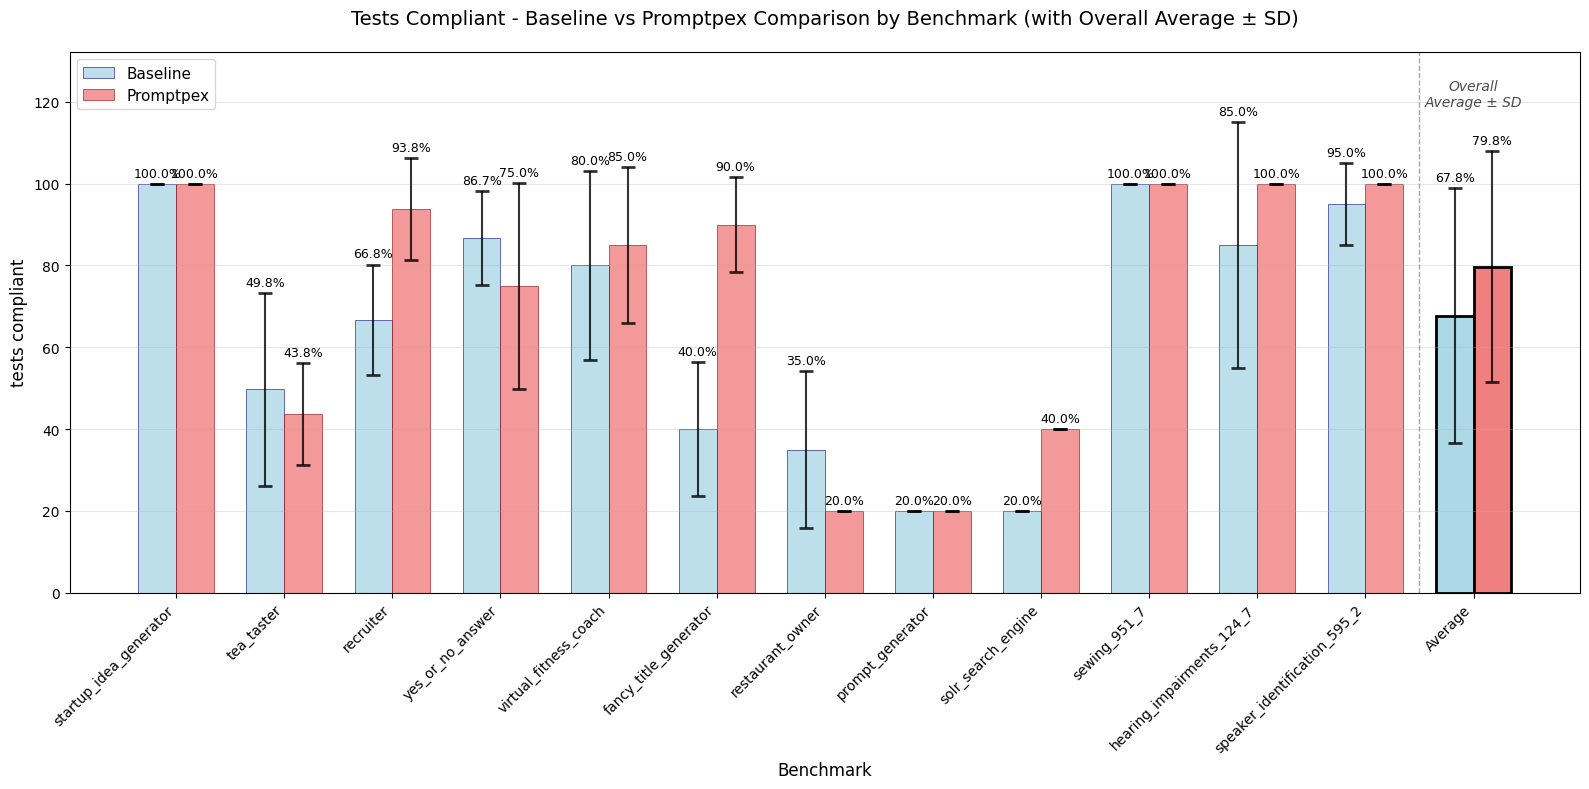


Summary Statistics for tests compliant:
Overall Average (Baseline): 67.76% ± 31.19%
Overall Average (Promptpex): 79.75% ± 28.17%
Overall Improvement: +11.99% (improvement)
Number of benchmarks: 12
Total data points: 42 baseline, 40 promptpex

Per-benchmark breakdown:
------------------------------------------------------------
startup_idea_generator:
  Baseline: 100.0% ± 0.0% (n=3)
  Promptpex: 100.0% ± 0.0% (n=3)
  Difference: +0.0%

tea_taster:
  Baseline: 49.8% ± 23.6% (n=4)
  Promptpex: 43.8% ± 12.5% (n=4)
  Difference: -6.0%

recruiter:
  Baseline: 66.8% ± 13.5% (n=4)
  Promptpex: 93.8% ± 12.5% (n=4)
  Difference: +27.0%

yes_or_no_answer:
  Baseline: 86.7% ± 11.5% (n=3)
  Promptpex: 75.0% ± 25.2% (n=4)
  Difference: -11.7%

virtual_fitness_coach:
  Baseline: 80.0% ± 23.1% (n=4)
  Promptpex: 85.0% ± 19.1% (n=4)
  Difference: +5.0%

fancy_title_generator:
  Baseline: 40.0% ± 16.3% (n=4)
  Promptpex: 90.0% ± 11.5% (n=4)
  Difference: +50.0%

restaurant_owner:
  Baseline: 35.0% ± 19

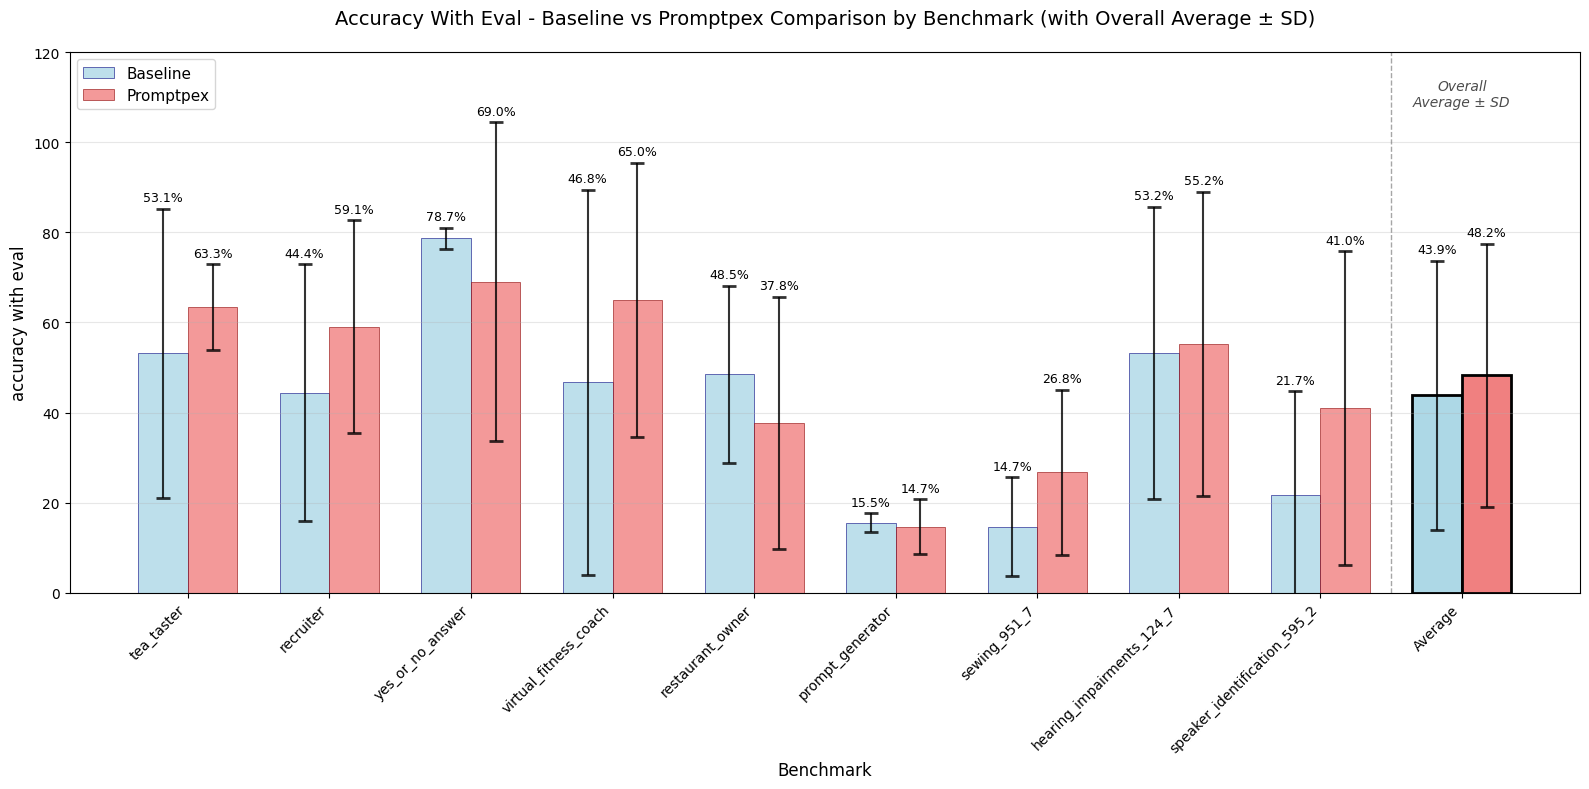


Summary Statistics for accuracy with eval:
Overall Average (Baseline): 43.87% ± 29.85%
Overall Average (Promptpex): 48.23% ± 29.22%
Overall Improvement: +4.36% (improvement)
Number of benchmarks: 9
Total data points: 31 baseline, 32 promptpex

Per-benchmark breakdown:
------------------------------------------------------------
tea_taster:
  Baseline: 53.1% ± 32.1% (n=4)
  Promptpex: 63.3% ± 9.5% (n=3)
  Difference: +10.2%

recruiter:
  Baseline: 44.4% ± 28.6% (n=4)
  Promptpex: 59.1% ± 23.7% (n=4)
  Difference: +14.7%

yes_or_no_answer:
  Baseline: 78.7% ± 2.3% (n=3)
  Promptpex: 69.0% ± 35.4% (n=4)
  Difference: -9.7%

virtual_fitness_coach:
  Baseline: 46.8% ± 42.7% (n=4)
  Promptpex: 65.0% ± 30.4% (n=3)
  Difference: +18.2%

restaurant_owner:
  Baseline: 48.5% ± 19.6% (n=4)
  Promptpex: 37.8% ± 28.0% (n=4)
  Difference: -10.8%

prompt_generator:
  Baseline: 15.5% ± 2.1% (n=2)
  Promptpex: 14.7% ± 6.1% (n=3)
  Difference: -0.8%

sewing_951_7:
  Baseline: 14.7% ± 11.0% (n=3)
  Promp

In [21]:
def plot_baseline_vs_main_compliance_by_benchmark(benchmarks, evalsDir, metric_column="tests compliant"):
    """
    Create a grouped bar plot showing % tests compliant for baseline vs main across benchmarks.
    
    Args:
        benchmarks: List of benchmark names
        evalsDir: Directory containing evaluation results
        metric_column: Column name to plot (default: "tests compliant")
    """
    import os
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Collect data for each benchmark
    benchmark_data = {}
    all_main_values = []  # For calculating overall statistics
    all_baseline_values = []
    
    for benchmark in benchmarks:
        main_csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview.csv")
        baseline_csv_path = os.path.join(evalsDir, benchmark, benchmark, "overview-baseline.csv")
        
        # Skip if either file doesn't exist
        if not (os.path.isfile(main_csv_path) and os.path.isfile(baseline_csv_path)):
            continue
            
        try:
            # Read both CSV files
            main_df = pd.read_csv(main_csv_path)
            baseline_df = pd.read_csv(baseline_csv_path)
            
            # Strip whitespace from column names
            main_df.columns = main_df.columns.str.strip()
            baseline_df.columns = baseline_df.columns.str.strip()
            
            # Check if the metric column exists in both files
            if metric_column not in main_df.columns or metric_column not in baseline_df.columns:
                print(f"Warning: '{metric_column}' not found in {benchmark}, skipping.")
                continue
            
            # Calculate average compliance for each dataset
            main_values = [parse_metric(val) for val in main_df[metric_column]]
            baseline_values = [parse_metric(val) for val in baseline_df[metric_column]]
            
            # Remove zero/invalid values for average calculation
            main_valid = [v for v in main_values if v > 0]
            baseline_valid = [v for v in baseline_values if v > 0]
            
            if main_valid and baseline_valid:
                main_avg = np.mean(main_valid)
                baseline_avg = np.mean(baseline_valid)
                main_std = np.std(main_valid, ddof=1) if len(main_valid) > 1 else 0.0
                baseline_std = np.std(baseline_valid, ddof=1) if len(baseline_valid) > 1 else 0.0
                
                benchmark_data[benchmark] = {
                    'main': main_avg,
                    'baseline': baseline_avg,
                    'main_std': main_std,
                    'baseline_std': baseline_std,
                    'main_count': len(main_valid),
                    'baseline_count': len(baseline_valid)
                }
                
                # Store individual values for overall statistics
                all_main_values.extend(main_valid)
                all_baseline_values.extend(baseline_valid)
            
        except Exception as e:
            print(f"Error processing {benchmark}: {str(e)}")
            continue
    
    if not benchmark_data:
        print("No benchmark data found for comparison.")
        return
    
    # Prepare data for plotting
    benchmark_names = list(benchmark_data.keys())
    main_values = [benchmark_data[b]['main'] for b in benchmark_names]
    baseline_values = [benchmark_data[b]['baseline'] for b in benchmark_names]
    main_errors = [benchmark_data[b]['main_std'] for b in benchmark_names]
    baseline_errors = [benchmark_data[b]['baseline_std'] for b in benchmark_names]
    
    # Calculate overall averages and standard deviations
    overall_main_avg = np.mean(all_main_values)
    overall_baseline_avg = np.mean(all_baseline_values)
    overall_main_std = np.std(all_main_values, ddof=1) if len(all_main_values) > 1 else 0.0
    overall_baseline_std = np.std(all_baseline_values, ddof=1) if len(all_baseline_values) > 1 else 0.0
    
    # Add averages to the data
    all_benchmark_names = benchmark_names + ["Average"]
    all_main_values_plot = main_values + [overall_main_avg]
    all_baseline_values_plot = baseline_values + [overall_baseline_avg]
    all_main_errors_plot = main_errors + [overall_main_std]
    all_baseline_errors_plot = baseline_errors + [overall_baseline_std]
    
    # Create the grouped bar plot
    x = np.arange(len(all_benchmark_names))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Create bars with error bars
    bars1 = ax.bar(x - width/2, all_baseline_values_plot, width, label='Baseline', 
                   color='lightblue', alpha=0.8, edgecolor='navy', linewidth=0.5,
                   yerr=all_baseline_errors_plot, capsize=5, error_kw={'capthick':2, 'alpha':0.8})
    bars2 = ax.bar(x + width/2, all_main_values_plot, width, label='Promptpex', 
                   color='lightcoral', alpha=0.8, edgecolor='darkred', linewidth=0.5,
                   yerr=all_main_errors_plot, capsize=5, error_kw={'capthick':2, 'alpha':0.8})
    
    # Highlight the average bars with different styling
    if len(all_benchmark_names) > len(benchmark_names):
        # Make average bars more prominent
        bars1[-1].set_alpha(1.0)
        bars1[-1].set_edgecolor('black')
        bars1[-1].set_linewidth(2)
        bars2[-1].set_alpha(1.0)
        bars2[-1].set_edgecolor('black')
        bars2[-1].set_linewidth(2)
    
    # Add a vertical separator line before the average group
    if len(all_benchmark_names) > 1:
        separator_x = len(benchmark_names) - 0.5
        ax.axvline(x=separator_x, color='gray', linestyle='--', alpha=0.7, linewidth=1)
    
    # Add value labels on bars
    def add_value_labels(bars, values, errors):
        for bar, value, error in zip(bars, values, errors):
            height = bar.get_height()
            # Position label above error bar
            label_height = height + error + 1.0
            ax.text(bar.get_x() + bar.get_width()/2., label_height,
                   f'{value:.1f}%', ha='center', va='bottom', fontsize=9)
    
    add_value_labels(bars1, all_baseline_values_plot, all_baseline_errors_plot)
    add_value_labels(bars2, all_main_values_plot, all_main_errors_plot)
    
    # Customize the plot
    ax.set_xlabel('Benchmark', fontsize=12)
    ax.set_ylabel(metric_column, fontsize=12)
    ax.set_title(f'{metric_column.title()} - Baseline vs Promptpex Comparison by Benchmark (with Overall Average ± SD)', fontsize=14, pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(all_benchmark_names, rotation=45, ha='right')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Set y-axis to accommodate error bars
    max_val = max(max(np.array(all_baseline_values_plot) + np.array(all_baseline_errors_plot)), 
                  max(np.array(all_main_values_plot) + np.array(all_main_errors_plot)))
    ax.set_ylim(0, max_val * 1.15)
    
    # Add text annotation for the average section
    if len(all_benchmark_names) > 1:
        ax.text(len(benchmark_names), ax.get_ylim()[1] * 0.95, 'Overall\nAverage ± SD', 
                ha='center', va='top', fontsize=10, style='italic', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics with standard deviations
    print(f"\nSummary Statistics for {metric_column}:")
    print("=" * 60)
    
    improvement = overall_main_avg - overall_baseline_avg
    
    print(f"Overall Average (Baseline): {overall_baseline_avg:.2f}% ± {overall_baseline_std:.2f}%")
    print(f"Overall Average (Promptpex): {overall_main_avg:.2f}% ± {overall_main_std:.2f}%")
    print(f"Overall Improvement: {improvement:+.2f}% ({'improvement' if improvement > 0 else 'decline'})")
    print(f"Number of benchmarks: {len(benchmark_names)}")
    print(f"Total data points: {len(all_baseline_values)} baseline, {len(all_main_values)} promptpex")
    
    print("\nPer-benchmark breakdown:")
    print("-" * 60)
    for benchmark in benchmark_names:
        data = benchmark_data[benchmark]
        diff = data['main'] - data['baseline']
        print(f"{benchmark}:")
        print(f"  Baseline: {data['baseline']:.1f}% ± {data['baseline_std']:.1f}% (n={data['baseline_count']})")
        print(f"  Promptpex: {data['main']:.1f}% ± {data['main_std']:.1f}% (n={data['main_count']})")
        print(f"  Difference: {diff:+.1f}%")
        print()

# Run the analysis
print("Creating baseline vs main compliance comparison...")
plot_baseline_vs_main_compliance_by_benchmark(benchmarks, evalsDir, "tests compliant")
plot_baseline_vs_main_compliance_by_benchmark(benchmarks, evalsDir, "accuracy with eval")